In [1]:
import pandas as pd
import numpy as np
import pickle
import random
from matplotlib import pyplot as plt
from monotonic_check import monotonicity_mse, check_monotonicity
from critical_values_finder import find_critical_values, highest_and_lowest_indexes
from calibration_check import calibration_check

In [ ]:
#manter plots salver disco
#classe 

In [2]:
with open('models/XGBoost/XGBoost.pkl', 'rb') as f:
    XGBoost = pickle.load(f)
with open('models/LogisticRegression/LogisticRegression.pkl', 'rb') as f:
    LR = pickle.load(f)
with open('models/RandomForest/RandomForest.pkl', 'rb') as f:
    RF = pickle.load(f)
with open('models/SVM/SVMTitanic.pkl', 'rb') as f:
    SVM = pickle.load(f)
models = [XGBoost, LR, RF]


In [10]:
df = pd.read_csv('../datasets/fraud_new.csv')
df_titanic = pd.read_csv('../datasets/TitanicClean.csv')
example = df.sample(1)
example = example.drop('isFraud', axis = 1)

In [4]:
example_titanic = df_titanic.sample(1)

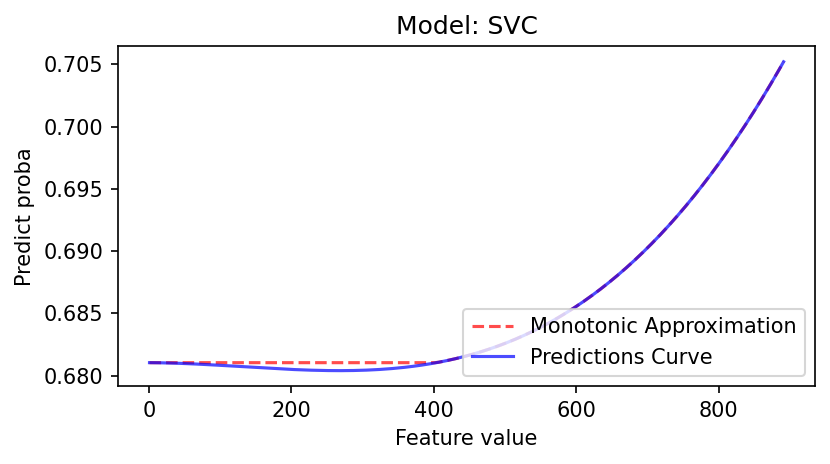

In [5]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = df_titanic[c].min()
        maxV = df_titanic[c].max()
        teste = check_monotonicity(c,minV,maxV,example_titanic, SVM, 150)
    break

In [6]:
print(teste)
teste.save_graphs()

In [7]:
print(teste.errors)
print(teste.warnings)
print(teste.metrics)
print(teste.model_info)

[]
["Feature 'PassengerId' doesn`t have monotonic behavior between ranges 1 and 891"]
{'monotonic': False, 'monotonic_score': 8.11419528690508e-08}
{'model_name': 'SVC', 'analysed_feature': 'PassengerId', 'feature_range': (1, 891)}


In [ ]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = 100
        maxV = 100
        find_critical_values(SVM, example_titanic, c, minV, maxV, step = 1000 )

Highest positives identified on feature step: 
	From values 38.475 to 45.97 : diff = 0.0007812976837158203
	From values 8.495 to 15.99 : diff = 0.00027424097061157227
	From values 225.848 to 233.343 : diff = 0.00015103816986083984
Lowest negatives identified on feature step: 
	From values 30.98 to 38.475 : diff = -0.0009999871253967285
	From values 15.99 to 23.485 : diff = 0.0
	From values 180.879 to 188.374 : diff = 0.0
Highest positives identified on feature step: 
	From values 1.0 to 8.495 : diff = 1.6708235128781723e-08
	From values 8.495 to 15.99 : diff = 1.529195281513296e-08
	From values 15.99 to 23.485 : diff = 1.3995722469850591e-08
Lowest negatives identified on feature step: 
	From values 713.02 to 720.515 : diff = -0.30900000000000005
	From values 405.727 to 413.222 : diff = -0.0010000000000000009


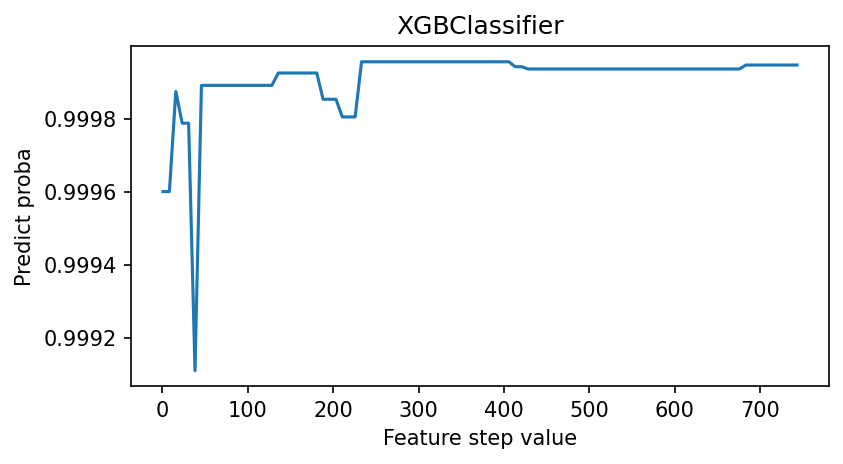

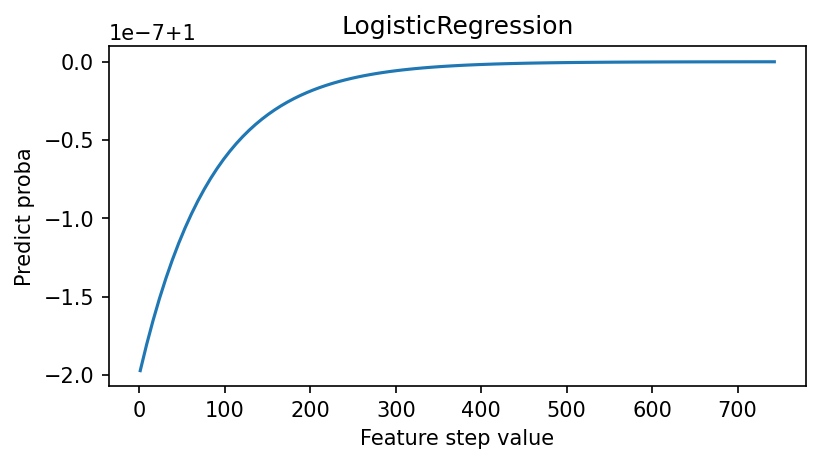

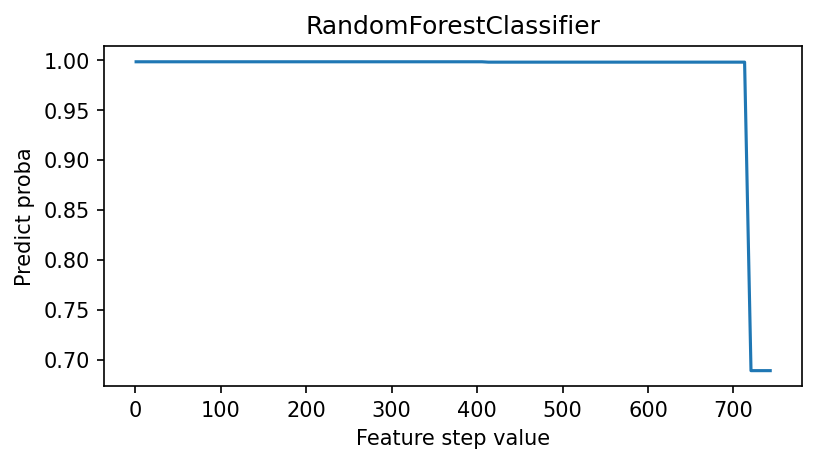

In [11]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            teste3 = find_critical_values(model, example, c, minV, maxV )
    break

In [ ]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            check_monotonicity(c,minV,maxV,example, model, 150, plot_graph=True)

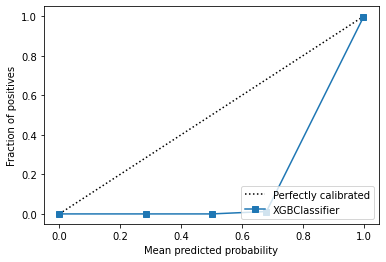

In [8]:
for model in models:
    teste2 = calibration_check("isFraud", model, df)
    break

In [9]:
teste2.save_graphs()

In [13]:
teste2.graphs

[]